In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib

In [2]:
# Load the dataset
file_path = "ml_Coloring_Skill_Development.csv"
data = pd.read_csv(file_path)

data.head()

,Image_ID,Stay_Within_Lines,Color_Choice_Score,Blending_Score,Completion_Score,Time_taken_(s),Task_Type
0,IMG_001,80,77,77,81,151,Outline Task
1,IMG_002,99,98,77,77,154,Outline Task
2,IMG_003,93,88,98,97,101,Coloring Task
3,IMG_004,86,78,86,93,104,Coloring Task
4,IMG_005,98,99,87,87,103,Coloring Task


In [3]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image_ID            600 non-null    object
 1   Stay_Within_Lines   600 non-null    int64 
 2   Color_Choice_Score  600 non-null    int64 
 3   Blending_Score      600 non-null    int64 
 4   Completion_Score    600 non-null    int64 
 5   Time_taken_(s)      600 non-null    int64 
 6   Task_Type           600 non-null    object
dtypes: int64(5), object(2)
memory usage: 32.9+ KB


In [4]:
# Data preprocessing
# Encode Task_Type
label_encoder = LabelEncoder()
data['Task_Type'] = label_encoder.fit_transform(data['Task_Type'])

C:\Users\kalan\AppData\Local\Temp\ipykernel_15844\59616337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Task_Type', palette="Set2")


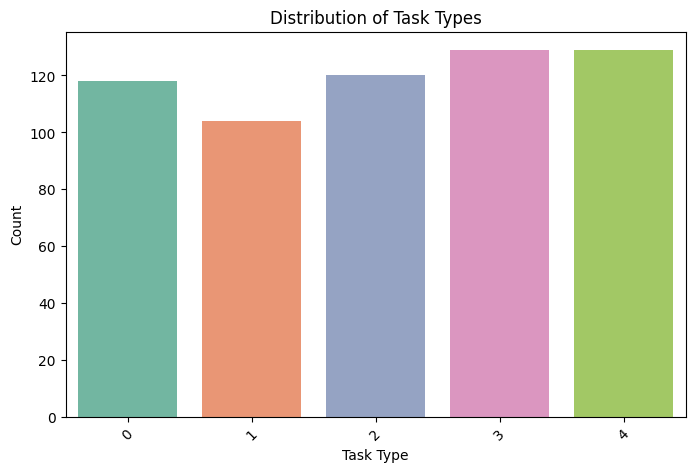

In [5]:
# Distribution of Task_Type
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Task_Type', palette="Set2")
plt.title("Distribution of Task Types")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [6]:
# Drop duplicates values
data = data.drop_duplicates()

In [7]:
# Features and target variable
X = data.drop(columns=['Image_ID', 'Task_Type'])
y = data['Task_Type']

In [8]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}

In [10]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Selecting the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

c:\Users\kalan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\kalan\AppData\Local\Temp\ipykernel_15844\3483233828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


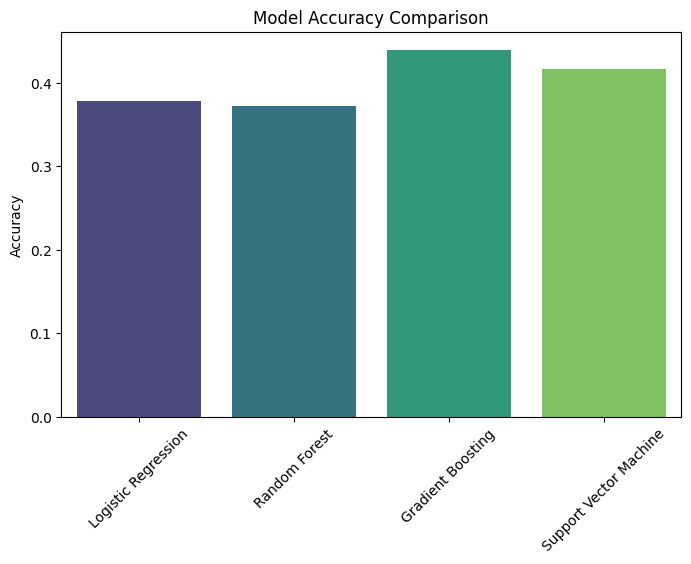

In [11]:
# Visualize model accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


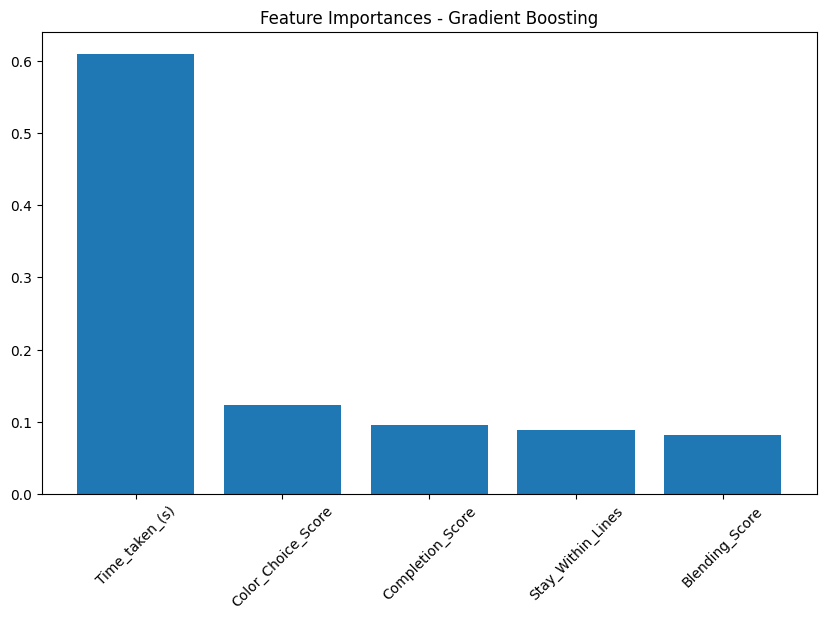

In [12]:
if best_model_name in ["Random Forest", "Gradient Boosting"]:
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    sorted_indices = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances - {best_model_name}")
    plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=45)
    plt.show()

In [13]:
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

# accuracy scores and classification report
print(f"Model Performance:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")

print(f"\nBest Model: {best_model_name}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

Model Performance:
Logistic Regression: 0.38
Random Forest: 0.37
Gradient Boosting: 0.44
Support Vector Machine: 0.42

Best Model: Gradient Boosting

Classification Report:
                precision    recall  f1-score   support

 Blending Task       0.56      0.45      0.50        40
 Coloring Task       0.29      0.33      0.31        27
Detailing Task       0.23      0.26      0.25        34
  Outline Task       0.69      0.77      0.73        43
  Shading Task       0.33      0.28      0.30        36

      accuracy                           0.44       180
     macro avg       0.42      0.42      0.42       180
  weighted avg       0.44      0.44      0.44       180



In [14]:
import joblib

# Save the model
joblib.dump(model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'


In [15]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

In [16]:
# Make predictions on new data
new_data = pd.DataFrame({
    'Stay_Within_Lines': [80],
    'Color_Choice_Score': [85],
    'Blending_Score': [88],
    'Completion_Score': [92],
    'Time_taken_(s)': [120]
})
predicted_task = loaded_model.predict(new_data)
predicted_task_label = label_encoder.inverse_transform(predicted_task)

print("Predicted Task Type:", predicted_task_label[0])

Predicted Task Type: Coloring Task
